# Customer Propensity Model

## Importing Libraries

In [1]:
import pandas
import seaborn as sns
import matplotlib.pylab as plt

## Loading the Dataset

In [2]:
train = pandas.read_csv('dataset/training_sample.csv')

## Data Cleaning and Segregation

### Exploring the Dataset

In [3]:
print(train.shape)
print(train.dtypes)

(455401, 25)
UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown          int64
closed_minibasket_click     int64
checked_delivery_detail     int64
checked_returns_detail      int64
sign_in                     int64
saw_checkout                int64
saw_sizecharts              int64
saw_delivery                int64
saw_account_upgrade         int64
saw_homepage                int64
device_mobile               int64
device_computer             int64
device_tablet               int64
returning_user              int64
loc_uk                      int64
ordered                     int64
dtype: object


In [4]:
# print(train.describe())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [5]:
train.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


### Examining Field Correlations

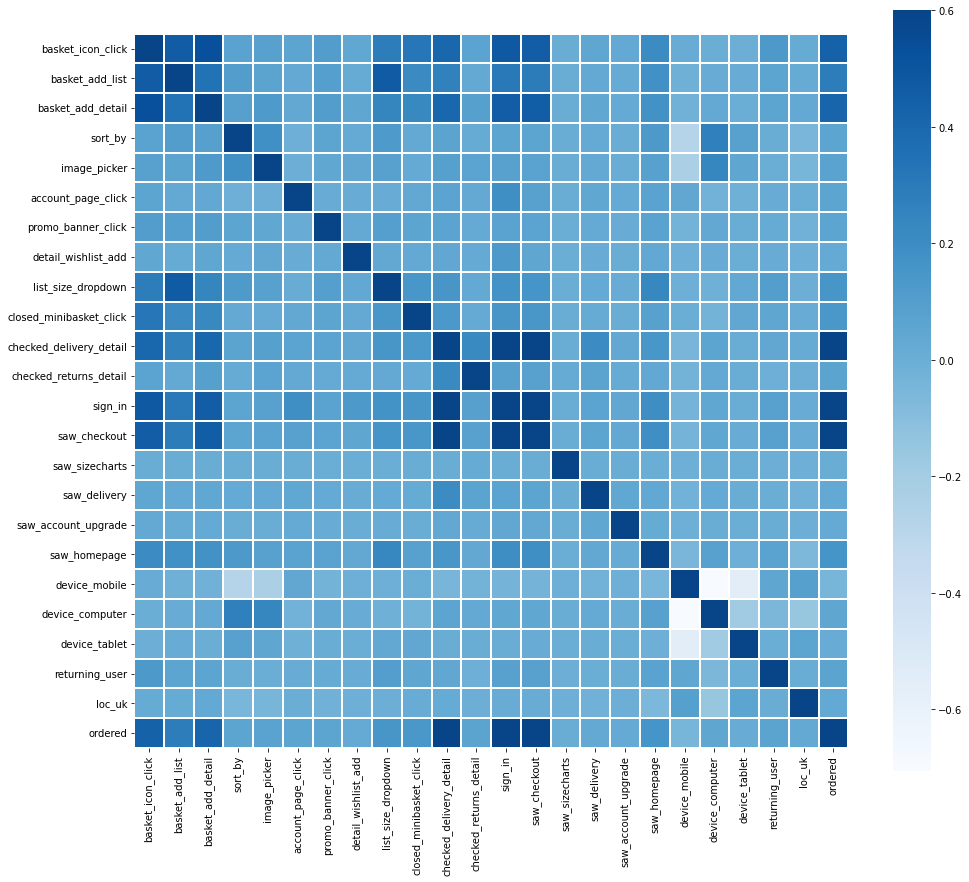

In [6]:
correlation = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation, vmax=0.6, center=0, square=True, linewidths=2, cmap='Blues')
# plt.savefig('heatmap.png')
plt.show()

In [7]:
train.corr()['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

The "saw_sizecharts" feature seems to have negligible correlation with the response.

### Defining Predictors

In [8]:
predictors = train.select_dtypes(include=['number'])
predictors = predictors.drop(['ordered', 'saw_sizecharts'], axis=1)

In [9]:
print(predictors.columns.size)
print(predictors.columns)

22
Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_delivery', 'saw_account_upgrade', 'saw_homepage',
       'device_mobile', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk'],
      dtype='object')


### Defining Labels

In [10]:
targets = train.ordered
print(targets)

0         0
1         0
2         0
3         0
4         1
         ..
455396    0
455397    0
455398    0
455399    0
455400    0
Name: ordered, Length: 455401, dtype: int64


## Training the Model

In [11]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [12]:
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.3)
print(x_train.shape, x_test.shape)

(318780, 22) (136621, 22)


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier = classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

sklearn.metrics.confusion_matrix(y_test, predictions)

array([[129314,   1559],
       [    68,   5680]], dtype=int64)

## Training Accuracy

In [14]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.988091142650105

## Making Predictions on Test Sample

In [15]:
yesterday_prospects = pandas.read_csv('dataset/testing_sample.csv')

In [16]:
print(yesterday_prospects.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

In [17]:
userIDs = yesterday_prospects.UserID
yesterday_prospects = yesterday_prospects.drop(['ordered', 'UserID', 'device_mobile'], axis=1)

In [18]:
print(yesterday_prospects.shape)

(151655, 22)


In [19]:
yesterday_prospects['propensity'] = classifier.predict_proba(yesterday_prospects)[:, 1]
print(yesterday_prospects.head(10))

   basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  1        0   
4                  0                0                  0        0   
5                  1                0                  1        0   
6                  0                0                  0        0   
7                  0                0                  0        0   
8                  1                1                  1        0   
9                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   


In [20]:
pandas.DataFrame(userIDs)
result = pandas.concat([userIDs, yesterday_prospects], axis=1)
print(result.head(20))

                                 UserID  basket_icon_click  basket_add_list  \
0   9d24-25k4-47889d24-25k4-494b-398124                  0                0   
1   7732-1k58-47887732-1k58-4475-679678                  0                0   
2   94k2-632j-471394k2-632j-4b4j-228160                  0                0   
3   jdd8-419d-4714jdd8-419d-4198-674376                  0                0   
4   7473-7595-47147473-7595-4757-227547                  0                0   
5   7j3d-j382-47157j3d-j382-4d3b-955343                  1                0   
6   bb4d-8019-4715bb4d-8019-4d42-763898                  0                0   
7   d09k-j446-4716d09k-j446-4469-572703                  0                0   
8    1397-7143-47171397-7143-4969-95351                  1                1   
9   3j36-dj4d-47183j36-dj4d-4478-404497                  0                0   
10   82b1-659j-471882b1-659j-45j1-32901                  0                0   
11  dj8d-141k-4718dj8d-141k-42db-743965             

In [21]:
result.to_csv('customer-propensity-result.csv')